In [231]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [232]:
dtrain=pd.read_csv('train.csv',delimiter=",")
dtest=pd.read_csv('test.csv',delimiter=",")

In [233]:
dtrain.head()


,# CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990,37.9
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474,21.4
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,0.806576,-3.795795,0.891076,12.7
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438,19.9
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,0.020560,0.431074,0.029007,22.5


In [234]:
Y=dtrain[ ' Y']
del dtrain[ ' Y']
dtrain

,# CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,0.806576,-3.795795,0.891076
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,0.020560,0.431074,0.029007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,-0.204929,-0.487722,1.231945,3.668398,0.434551,2.161728,1.053485,-0.833960,-0.523001,-0.031105,-1.736418,0.361122,-1.504494
375,0.231398,-0.487722,1.015999,-0.272599,1.367490,0.215644,0.687212,-0.703186,1.661245,1.530926,0.806576,-2.812183,0.499991
376,-0.408311,-0.487722,0.247057,-0.272599,-1.016689,-0.206055,-0.809889,0.140451,-0.523001,-0.060801,0.113032,0.332066,-0.334043
377,-0.410620,-0.487722,-1.152214,-0.272599,-0.818007,0.068904,-1.826921,0.674814,-0.637962,0.129256,-0.719220,0.203235,-0.744752


In [235]:
dtest.head()

,2.91816626,-0.48772236,1.01599907,-0.27259857,0.36544404,-1.60934343,1.11749449,-1.04849446,1.66124525,1.53092646,0.80657583,-1.59755122,1.04106182
0,-0.403392,-0.487722,0.406098,-0.272599,-1.016689,0.560412,-1.332629,1.029344,-0.637962,-0.708183,-1.135347,0.441052,-0.894738
1,-0.413178,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
2,-0.412649,0.413589,-0.802031,-0.272599,-0.999412,-0.408356,-1.677566,1.435452,-0.637962,-0.981390,-0.765457,0.441052,-0.591963
3,-0.405882,-0.487722,-0.375976,-0.272599,-0.299707,-0.127698,-0.504068,-0.483566,-0.523001,-0.143951,1.130230,0.403663,0.048631
4,-0.228814,-0.487722,1.568995,-0.272599,0.598679,-1.803097,1.117494,-1.119800,-0.637962,0.170831,1.268938,0.441052,3.049752


In [236]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [237]:
dx=np.array(dtrain)
dx

array([[-0.40784991, -0.48772236, -1.2660231 , ..., -0.30309415,
         0.41057102, -1.09799011],
       [-0.40737368, -0.48772236,  0.24705682, ...,  0.1130321 ,
         0.29116915, -0.52047412],
       [ 0.1251786 , -0.48772236,  1.01599907, ...,  0.80657583,
        -3.79579542,  0.89107588],
       ...,
       [-0.40831101, -0.48772236,  0.24705682, ...,  0.1130321 ,
         0.33206621, -0.33404299],
       [-0.41061997, -0.48772236, -1.15221381, ..., -0.71922039,
         0.203235  , -0.74475218],
       [ 0.34290895, -0.48772236,  1.01599907, ...,  0.80657583,
         0.38787479, -1.35871335]])

In [238]:
dy=np.array(Y)
dy

array([37.9, 21.4, 12.7, 19.9, 22.5, 32.7, 23.2, 21.5, 20.5, 33.3, 23.1,
       20. , 50. , 25. , 20.2, 16.4, 22.4, 20.4, 18.4, 37.3, 23.1, 34.7,
       33.1, 28.7, 15.6, 18.2, 17.2, 31.5, 26.6, 24.1, 22.3, 19.5, 36.1,
       17.6, 33.4,  8.8,  9.7, 13.4, 39.8, 24.4, 17.8, 24.3, 24. , 23.1,
       13.1, 16.7, 22.8, 27.5, 14.6, 13.4, 11. , 19.4, 15. , 44.8, 29.6,
       12.3, 24.6, 10.9, 28. , 30.8, 15.4, 18. , 35.2, 11.5, 19.5, 24.8,
       22.2, 20.1, 15.2, 50. , 17.1, 23. , 12. , 22. , 20. , 20.3, 17.2,
       37.2,  5. , 24.5, 18.9, 24.5, 24.8, 21.6,  7. , 17.7, 12.8, 14.9,
       18.3, 15.6, 19.9, 22.2, 16.7, 32.5, 25.1, 30.1, 16.1, 20.7, 46. ,
       22.3, 23. , 11.9, 23.3, 23.2, 22. , 10.5, 17.2, 29.8, 29. , 17.3,
       20.6, 20.1, 20.6, 17.8, 25. , 22.6, 18.7, 11.3,  9.6, 17.8, 23.9,
       38.7, 21.2, 25. , 28.5, 24. , 20.6,  5. , 22.9, 18.4, 31. , 36. ,
       20.8, 13.3, 23.2, 28.2, 43.8, 26.6, 23.9, 23.9, 27.9, 19.1, 30.5,
        8.3,  8.5, 16.5, 23.8, 19.6, 22.2, 24.3, 32

In [239]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=2000000000, tol=1e-10))
reg.fit(dx, dy)
print(reg)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=2000000000, tol=1e-10))])


In [240]:
dxpredictresult=np.array(reg.predict(dx))
print(reg.predict(dx))

[33.84265083 24.68704495 13.69239196 19.18690085 22.33178742 30.98918163
 22.31210305 21.29406615 20.26205075 36.1791531  25.22864762 23.46384614
 42.8170457  26.25665005 22.73285529 19.2598801  22.92802896 20.20908305
 19.7459512  32.82453257 21.27526428 30.97117088 34.81221274 26.00105685
 21.87518144 19.79791614 13.15340496 32.9084099  28.3667494  29.3450584
 27.05744396 19.87675267 32.12310874 16.77613998 34.34641124  7.45434354
  9.54518879 14.85957322 34.28610434 23.60032203 17.5218577  29.73058822
 25.42858474 12.38594044 14.37643055 19.78164172 27.33568401 25.11705797
  8.26054617 13.6041927  14.64653171 20.05553821 18.84124903 38.15099648
 25.53073085 12.57367959 25.21404889 17.90415046 28.46255799 30.43580148
 14.99882743 18.74480505 35.22927475 14.036496   17.33597223 25.65396629
 19.50530007 17.81545031 13.57689112 43.7238073  19.22682608 29.86494743
 11.2559446  26.19147471 20.38663409 19.4559494  17.31158549 32.89541164
  8.27148154 21.60694608 15.74257597 27.03183194 26.

In [241]:
avg_percent_error=0
for i in range (len(dxpredictresult) ):
    print(i,":  predicted result= ",dxpredictresult[i],",  expected output= ",dy[i],",  % error=",(abs((dxpredictresult[i]-dy[i]))/dy[i])*100)
    avg_percent_error+=(abs((dxpredictresult[i]-dy[i]))/dy[i])*100
avg_percent_error=avg_percent_error/len(dxpredictresult)

0 :  predicted result=  33.84265083141181 ,  expected output=  37.9 ,  % error= 10.705406777277544
1 :  predicted result=  24.687044947296044 ,  expected output=  21.4 ,  % error= 15.360023118205824
2 :  predicted result=  13.69239196473479 ,  expected output=  12.7 ,  % error= 7.814109958541664
3 :  predicted result=  19.186900852222546 ,  expected output=  19.9 ,  % error= 3.58341280290177
4 :  predicted result=  22.331787415318715 ,  expected output=  22.5 ,  % error= 0.7476114874723786
5 :  predicted result=  30.9891816321348 ,  expected output=  32.7 ,  % error= 5.231860452187159
6 :  predicted result=  22.312103053872853 ,  expected output=  23.2 ,  % error= 3.8271420091687327
7 :  predicted result=  21.29406615484482 ,  expected output=  21.5 ,  % error= 0.9578318379310675
8 :  predicted result=  20.26205075156853 ,  expected output=  20.5 ,  % error= 1.16072804112912
9 :  predicted result=  36.1791530971103 ,  expected output=  33.3 ,  % error= 8.646105396727641
10 :  predicted

140 :  predicted result=  20.435510487741897 ,  expected output=  27.9 ,  % error= 26.754442696265595
141 :  predicted result=  16.92554089961977 ,  expected output=  19.1 ,  % error= 11.384602619791794
142 :  predicted result=  31.187414592249674 ,  expected output=  30.5 ,  % error= 2.2538183352448318
143 :  predicted result=  13.013116782847005 ,  expected output=  8.3 ,  % error= 56.784539552373545
144 :  predicted result=  16.094944025796757 ,  expected output=  8.5 ,  % error= 89.35228265643244
145 :  predicted result=  10.966292479901297 ,  expected output=  16.5 ,  % error= 33.53762133393153
146 :  predicted result=  23.917022786599677 ,  expected output=  23.8 ,  % error= 0.4916923806709095
147 :  predicted result=  19.526227305684344 ,  expected output=  19.6 ,  % error= 0.3763912975288641
148 :  predicted result=  23.870174840521212 ,  expected output=  22.2 ,  % error= 7.523310092437896
149 :  predicted result=  24.631026543092435 ,  expected output=  24.3 ,  % error= 1.362

354 :  predicted result=  15.811592457282732 ,  expected output=  16.6 ,  % error= 4.749443028417287
355 :  predicted result=  -4.03341418839214 ,  expected output=  7.0 ,  % error= 157.62020269131628
356 :  predicted result=  25.173150091212257 ,  expected output=  22.7 ,  % error= 10.894934322520959
357 :  predicted result=  33.969755839542174 ,  expected output=  27.0 ,  % error= 25.81391051682286
358 :  predicted result=  13.869324404378133 ,  expected output=  13.5 ,  % error= 2.7357363287269143
359 :  predicted result=  18.45545628696079 ,  expected output=  16.1 ,  % error= 14.63016327304837
360 :  predicted result=  20.52825285046163 ,  expected output=  21.4 ,  % error= 4.073584810926956
361 :  predicted result=  29.886318558153274 ,  expected output=  24.6 ,  % error= 21.48909982989135
362 :  predicted result=  19.434304823863975 ,  expected output=  20.1 ,  % error= 3.3119162991842095
363 :  predicted result=  37.27728331288097 ,  expected output=  50.0 ,  % error= 25.445433

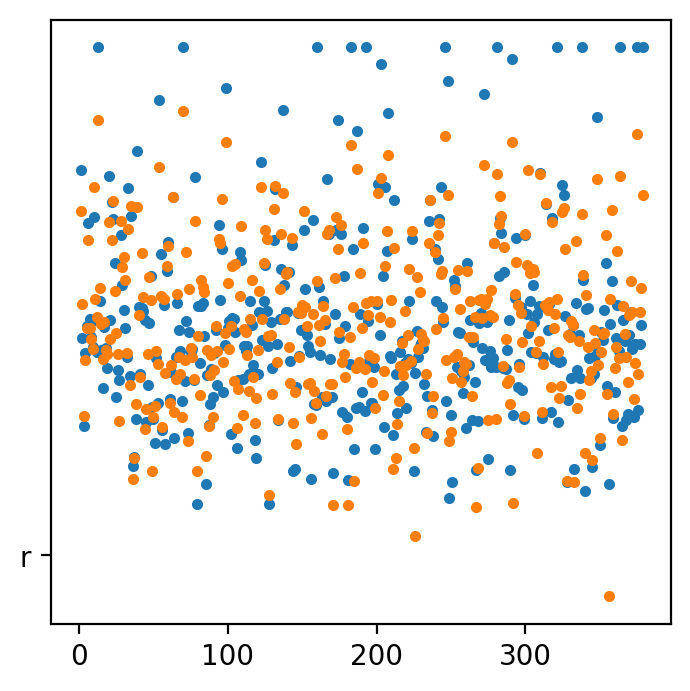

In [242]:
x=np.arange(1,len(dxpredictresult)+1)
plt.figure(figsize=(4,4),dpi=200)
plt.plot(x,dy, '.', label='x')
plt.plot(x,dxpredictresult,'.','r',label='x',)
plt.savefig('regression.png', dpi=300)




In [245]:
print("accuracy on train data on a scale of [0,1]=",reg.score(dx,dy,sample_weight=None))
print("average error in %=",avg_percent_error)

errorSGD=mean_squared_error(dy,reg.predict(dx))
print("mean squared error",errorSGD)

accuracy on train data on a scale of [0,1]= 0.7314171399007198
average error in %= 17.018900081017954
mean squared error 23.61725327036741


In [244]:
print("Test_Accuracy: {:.2f}%".format(reg.accuracy_score(dx, dy)[1]*100))

AttributeError: 'Pipeline' object has no attribute 'accuracy_score'

In [ ]:
dxtest=np.array(dtest)

In [ ]:
dxtestresult=np.array(reg.(dx))

In [ ]:
for i in range(len(dxtestresult)):
   print(i,":  predicted result=",dxtestresult[i])

In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
import seaborn as sns

# import for train-test-split
from sklearn.model_selection import train_test_split

# import for One Hot Encoding
from keras.utils import to_categorical

# importing libraries for Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# importing libraries for evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(dx, dy, test_size = 0.2, random_state = 0)
print('Train data shape {} ,Test data shape {} '.format(X_train.shape, X_valid.shape))

In [ ]:
X_train = X_train.astype('float32')  
X_valid = X_valid.astype('float32')

In [ ]:
# One Hot Encoding 
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

BUILDING MODEL CNN

In [ ]:
# Defining Model
classifier = Sequential()

# CNN layers
classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape = (13), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))   # Dropout prevents overfitting

classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape = (13), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=2, activation='softmax'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(dx, dy, test_size = 0.2, random_state = 0)
print('Train data shape {} ,Test data shape {} '.format(X_train.shape, X_valid.shape))